# WeRateDogs Data Wrangling
### By Mengting Tang

In [648]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sb

## 1. Gathering Data

In [649]:
# read in "twitter-archive-enhanced.csv" and have a quick look
t_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [650]:
image_pre = pd.read_csv('image_predictions.tsv', sep = '\t')

In [651]:
# read in "tweet-json.txt"
tweets = pd.read_json('tweet-json.txt', lines = True, encoding = 'utf-8')


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = t_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


## 2. Assessing Data

### 2.1 Visually Assessing Data – t_enhanced

In [652]:
t_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

**Problems**
* some columns are unnecessary and should be removed
* rows like row 27 have two expanded urls
* some rows are missing dogs' names
* last four columns of dog stage shouldn't be separated
* "Name" column contains lots of "a" "None" "such" that need to be excluded

### Programmatically Assessing Data – t_enhanced

In [653]:
t_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Data type issues
* timestamp should be datetime
* retweeted_status_timestamp should be datetime
* tweet_id should be string instead of integer


In [654]:
t_enhanced.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

***Some columns have null values***

In [655]:
t_enhanced.duplicated().sum()

0

In [656]:
t_enhanced.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [657]:
t_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

#### Numerator issues
* max is 1776, there might be some outliers

In [658]:
t_enhanced.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [659]:
t_enhanced.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

#### Denominator issues
* min is 0, while it should be 10
* max is 170, there might outliers, should be fixed for consistency

### 2.2 Visually Assessing Data – image_pre

In [660]:
image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Problems**
* Under "p1" , "p2" & "p3", some words are all in lowercase, others have the first letter in uppercase.
* p1 identifications like "box_turtle" & "school bus" are clearly not dogs and should be deleted. 

### Programmatically Assessing Data – image_pre

In [661]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [662]:
assert [image_pre.isna() == False]
assert [image_pre.duplicated() == False]

In [663]:
image_pre.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
German_shepherd              20 
Siberian_husky               20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
beagle                       18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
teddy                        18 
Maltese_dog                  18 
Lakeland_terrier             17 
Shih-Tzu                     17 
Rottweiler                   17 
Italian_greyhound            16 
kuvasz                       16 
          

### 2.3 Visually Assessing Data – tweets

In [664]:
tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

**Problems**
* There are some null values in the "extended_entities" column
* Most columns are unnecessary information

### Promatically Assessing Data – tweets

In [665]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [666]:
tweets.id.duplicated().sum()

0

## Assessment Summary

### Quality Issues
1. Retweet rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp should be removed, since we're only looking at original tweets 
2. Some columns in all three datasets are useless for analysis and should be removed.(e.g. "img_num" in image_pre_clean)
3. Rows with denominators other than 10 should be checked and corrected
4. Datatype of "timestamp" should be datetime. Datatype of "tweet_id" should be converted to string instead of integer.
5. "Name" column containing non-name values, all in lowercase, should be corrected. "None" dog values should be converted to NULL object.
6. Rows with three "False" predictions in p1, p2, p3 should be deleted because they are not dogs.
7. Under "p1" , "p2" & "p3", some words are all in lowercase, others have the first letter in uppercase.
8. Some columns need to be renamed for clarity
9. Rating with decimal values were incorrectly extracted.

## 3. Cleaning Data

### Creating cleaned dataframes for cleaning use

In [667]:
t_enhanced_clean = t_enhanced.copy()
image_pre_clean = image_pre.copy()
tweets_clean = tweets.copy()

### Quality Issue 1

**Define**   
Drop rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

**Code**  

In [668]:
t_enhanced_clean.drop(t_enhanced_clean[t_enhanced_clean.retweeted_status_id.notnull()].index, inplace = True)
tweets_clean.drop(tweets_clean[tweets.retweeted_status.notnull()].index, inplace = True)

**Test**  

In [669]:
t_enhanced_clean.info()
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Quality Issue 2

**Define**   
Drop unnecessary columns

**Code**  

In [670]:
# drop unnecessary columns
t_enhanced_clean.drop(labels = 
                      ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)
image_pre_clean.drop('img_num', axis = 1, inplace = True)
tweets_clean = tweets_clean.filter(items=['id', 'favorite_count', 'retweet_count'])

**Test**  

In [671]:
t_enhanced_clean.info()
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
id                2175 non-null int64
favorite_count    2175 non-null int64
retweet_count     2175 non-null int64
dtypes: int64(3)
memory usage: 68.0 KB


### Quality Issue 3

**Define**   
Check for and fix rows with a denominator other than 10 

**Code**  

In [672]:
pd.set_option('display.max_colwidth', -1)

In [673]:
# show rows with a non-ten denominator
t_enhanced_clean[t_enhanced_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None


In [674]:
t_enhanced_clean.at[313, 'rating_denominator'] = 10
t_enhanced_clean.at[1068, 'rating_denominator'] = 10
t_enhanced_clean.at[1165, 'rating_denominator'] = 10
t_enhanced_clean.at[1202, 'rating_denominator'] = 10
t_enhanced_clean.at[1662, 'rating_denominator'] = 10
t_enhanced_clean.at[2335, 'rating_denominator'] = 10

**Test**  

In [675]:
t_enhanced_clean[t_enhanced_clean.rating_denominator != 10]

# The rest are all invalid denominator values

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,None,None,None,None


### Quality Issue 4

**Define**   
Change the data type of "timestamp" to datetime
Convert datatype of "tweet_id" in three datasets to string instead of integer

**Code**  

In [676]:
t_enhanced_clean.timestamp = t_enhanced_clean.timestamp.astype('datetime64')
t_enhanced_clean.tweet_id = t_enhanced_clean.tweet_id.astype('str')
image_pre_clean.tweet_id = image_pre_clean.tweet_id.astype('str')
tweets_clean.id = tweets_clean.id.astype('str')

**Test**  

In [677]:
t_enhanced_clean.dtypes

tweet_id              object        
timestamp             datetime64[ns]
source                object        
text                  object        
expanded_urls         object        
rating_numerator      int64         
rating_denominator    int64         
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dtype: object

In [678]:
image_pre_clean.dtypes

tweet_id    object 
jpg_url     object 
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [679]:
tweets_clean.dtypes

id                object
favorite_count    int64 
retweet_count     int64 
dtype: object

### Quality Issue 5

**Define**   
Convert non-name values, like "a", "an", "such", "None" to NULL in "name" column

**Code** 

In [680]:
# find all invalid name values, all in lowercase
t_enhanced_clean[t_enhanced_clean.name.str.islower()].name.value_counts()

a               55
the             8 
an              6 
very            4 
one             4 
quite           3 
just            3 
actually        2 
not             2 
getting         2 
by              1 
his             1 
incredibly      1 
light           1 
space           1 
officially      1 
unacceptable    1 
all             1 
this            1 
life            1 
my              1 
mad             1 
old             1 
infuriating     1 
such            1 
Name: name, dtype: int64

In [681]:
t_enhanced_clean.loc[t_enhanced_clean.name.str.islower().fillna(False),'name'] = np.nan
t_enhanced_clean['name'] = t_enhanced_clean['name'].replace('None', np.nan)

In [682]:
t_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 300.9+ KB


**Test**  

In [683]:
t_enhanced_clean.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
Sadie       8 
Lola        8 
Winston     8 
Daisy       7 
Toby        7 
Koda        6 
Bella       6 
Bo          6 
Oscar       6 
Stanley     6 
Bailey      6 
Jax         6 
Rusty       5 
Buddy       5 
Louis       5 
Leo         5 
Scout       5 
Chester     5 
Dave        5 
Milo        5 
Bentley     5 
Jeffrey     4 
Finn        4 
Scooter     4 
           .. 
Gromit      1 
Duddles     1 
Schnozz     1 
Mitch       1 
Acro        1 
Kara        1 
Beya        1 
Kaia        1 
Kyro        1 
Biden       1 
Fynn        1 
Molly       1 
Ginger      1 
Stubert     1 
Kirk        1 
Marty       1 
Carbon      1 
Gustav      1 
Dunkin      1 
Canela      1 
Timofy      1 
Remy        1 
Stormy      1 
Jazz        1 
Skittles    1 
Mookie      1 
Crumpet     1 
Alfy        1 
Andru       1 
Pherb       1 
Name: name, Length: 930, dtype: int64

### Quality Issue 6

**Define**   
Delete rows with three "False" predictions in p1_dog, p2_dog, p3_dog because they are not dogs.

**Code**  

In [684]:
# find rows where p1, p2, p3 are all "False"
image_pre_clean.drop(image_pre_clean[(image_pre_clean.p1_dog == False) & (image_pre_clean.p2_dog == False) & (image_pre_clean.p3_dog == False)].index, inplace = True)

**Test**  

In [685]:
image_pre_clean[(image_pre_clean.p1_dog == False) & (image_pre_clean.p2_dog == False) & (image_pre_clean.p3_dog == False)].count()

tweet_id    0
jpg_url     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality Issue 7

**Define**   
Convert all values in "p1" , "p2" & "p3" to capitalized form.

**Code & Test**

In [686]:
image_pre_clean.p1 = image_pre_clean.p1.str.capitalize()
image_pre_clean.p2 = image_pre_clean.p2.str.capitalize()
image_pre_clean.p3 = image_pre_clean.p3.str.capitalize()

### Quality Issue 8

**Define**   
Some columns need to be renamed for clarity

**Code**

In [687]:
# rename columns in image_pre_clean
image_pre_clean.rename(columns = {'p1': 'prediction_1', 
                       'p1_conf': 'prediction_1_confidence',
                       'p1_dog': 'prediction_1_dog',
                       'p2': 'prediction_2', 
                       'p2_conf': 'prediction_2_confidence',
                       'p2_dog': 'prediction_2_dog',
                       'p3': 'prediction_3', 
                       'p3_conf': 'prediction_3_confidence',
                       'p3_dog': 'prediction_3_dog'}, inplace = True )

In [688]:
# rename columns in tweets_clean
tweets_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

**Test**

In [689]:
image_pre_clean.sample(1)

,tweet_id,jpg_url,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
1236,746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,Golden_retriever,0.256505,True,Labrador_retriever,0.252417,True,Seat_belt,0.203163,False


In [690]:
tweets_clean.sample(1)

,tweet_id,favorite_count,retweet_count
2002,672466075045466113,1447,598


### Quality Issue 9

**Define**   
Rating with decimal values were incorrectly extracted.

**Code**

In [691]:
ratings = t_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
t_enhanced_clean.rating_numerator = ratings

In [692]:
# convert rating_numerator to 'float'
t_enhanced_clean.rating_numerator = t_enhanced_clean.rating_numerator.astype('float')

**Test**

In [693]:
t_enhanced_clean.rating_numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00       98 
7.00       54 
14.00      43 
5.00       34 
6.00       32 
3.00       19 
4.00       17 
2.00       9  
1.00       8  
420.00     2  
0.00       2  
17.00      1  
24.00      1  
84.00      1  
13.50      1  
15.00      1  
960.00     1  
143.00     1  
50.00      1  
99.00      1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
1776.00    1  
9.75       1  
666.00     1  
11.27      1  
121.00     1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
60.00      1  
80.00      1  
Name: rating_numerator, dtype: int64

### Tidiness Issues
1. Dog stages need not be recorded across columns, there should only be on column that holds different dog stages.
2. Three datasets should be joined since they contain the same observational unit spread across three different datasets.

### Tidiness Issues  1

**Define**   
Combine multiple columns for dog stages

**Code**

In [694]:
# use loc to combine columns to make the data tidy
t_enhanced_clean.loc[t_enhanced_clean.doggo == 'doggo', 'dog_stage'] = 'doggo'
t_enhanced_clean.loc[t_enhanced_clean.floofer == 'floofer', 'dog_stage'] = 'floofer'
t_enhanced_clean.loc[t_enhanced_clean.pupper == 'pupper', 'dog_stage'] = 'pupper'
t_enhanced_clean.loc[t_enhanced_clean.puppo == 'puppo', 'dog_stage'] = 'puppo'

In [695]:
# drop the original 4 columns of dog types
t_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

**Test**

In [696]:
t_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  1391 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 249.9+ KB


In [697]:
image_pre_clean.prediction_1.value_counts()

Golden_retriever               150
Labrador_retriever             100
Pembroke                       89 
Chihuahua                      83 
Pug                            57 
Chow                           44 
Samoyed                        43 
Toy_poodle                     39 
Pomeranian                     38 
Malamute                       30 
Cocker_spaniel                 30 
French_bulldog                 26 
Miniature_pinscher             23 
Chesapeake_bay_retriever       23 
Seat_belt                      21 
Staffordshire_bullterrier      20 
German_shepherd                20 
Siberian_husky                 20 
Cardigan                       19 
Beagle                         18 
Shetland_sheepdog              18 
Eskimo_dog                     18 
Maltese_dog                    18 
Lakeland_terrier               17 
Shih-tzu                       17 
Rottweiler                     17 
Italian_greyhound              16 
Kuvasz                         16 
West_highland_white_

### Tidiness Issues  2

**Define**   
Merge three datasets should be merged as they are part of the same observational unit

**Code**

In [698]:
tweets_clean.dtypes

tweet_id          object
favorite_count    int64 
retweet_count     int64 
dtype: object

In [699]:
twitter_archive_master = pd.merge(t_enhanced_clean, image_pre_clean, on = 'tweet_id', how = 'inner')
twitter_archive_master = pd.merge(twitter_archive_master, tweets_clean, on = 'tweet_id', how = 'inner')

In [700]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Cleaned Data

In [701]:
tw = pd.read_csv('twitter_archive_master.csv')

In [702]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 21 columns):
tweet_id                   1686 non-null int64
timestamp                  1686 non-null object
source                     1686 non-null object
text                       1686 non-null object
expanded_urls              1686 non-null object
rating_numerator           1686 non-null float64
rating_denominator         1686 non-null int64
name                       1187 non-null object
dog_stage                  260 non-null object
jpg_url                    1686 non-null object
prediction_1               1686 non-null object
prediction_1_confidence    1686 non-null float64
prediction_1_dog           1686 non-null bool
prediction_2               1686 non-null object
prediction_2_confidence    1686 non-null float64
prediction_2_dog           1686 non-null bool
prediction_3               1686 non-null object
prediction_3_confidence    1686 non-null float64
prediction_3_dog           1686 

### Q1: What are the most common dog names?

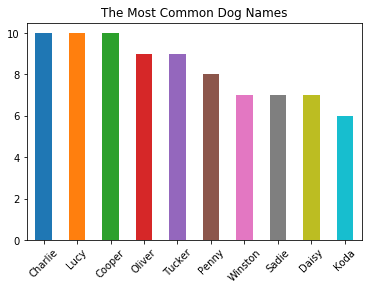

In [703]:
# visualize most common dog names
tw.name.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title('The Most Common Dog Names');

### Insight 1:
As is shown in the plot, the most common names of dogs are Charlie, Oliver and Lucy.

### Q2: What are the most common dog breeds?

In [704]:
tw.prediction_1.value_counts()

Golden_retriever               139
Labrador_retriever             95 
Pembroke                       88 
Chihuahua                      79 
Pug                            54 
Chow                           41 
Samoyed                        40 
Toy_poodle                     38 
Pomeranian                     38 
Malamute                       29 
Cocker_spaniel                 27 
French_bulldog                 26 
Chesapeake_bay_retriever       23 
Miniature_pinscher             22 
Seat_belt                      20 
German_shepherd                20 
Siberian_husky                 20 
Staffordshire_bullterrier      19 
Eskimo_dog                     18 
Shetland_sheepdog              18 
Maltese_dog                    18 
Shih-tzu                       17 
Cardigan                       17 
Rottweiler                     17 
Beagle                         17 
Italian_greyhound              16 
Lakeland_terrier               16 
Kuvasz                         16 
Great_pyrenees      

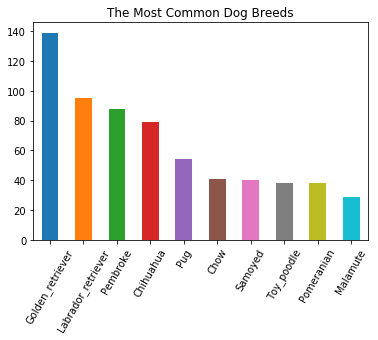

In [705]:
tw.prediction_1.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('The Most Common Dog Breeds');

### Insight 2:
As is shown in the plot, the most common breeds of dogs are Golden Retriever, Labrador Retriever and Pembroke.

### Q3: Which sources did the most tweets come from?

In [706]:
tw.source_x = tw.source.str.replace(r'<(?:a\b[^>]*>|/a>)','')
tw.source_x = tw.source_x.astype('category');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


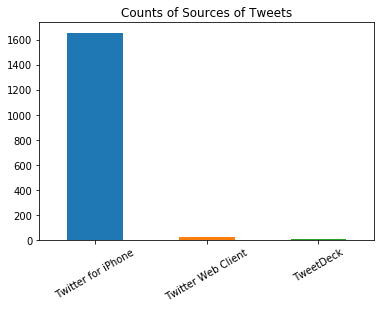

In [707]:
tw.source_x.value_counts().plot(kind = 'bar');
plt.xticks(rotation = 30)
plt.title('Counts of Sources of Tweets');

### Insight 3:
As is shown in the plot, the most common source of all tweets is "Twitter for iPhone".

### Q4: Which stage of dogs received the highest retweets?

In [708]:
# select only the non-null values under "dog_type"
tw_stage = tw[tw.dog_stage.isnull() == False]

In [709]:
tw.dog_stage.value_counts()

pupper     176
doggo      54 
puppo      22 
floofer    8  
Name: dog_stage, dtype: int64

In [710]:
by_stage = tw_stage.query('dog_stage == "doggo" or dog_stage == "floofer" or dog_stage == "puppo" or dog_stage == "pupper"')

In [711]:
fav_count = pd.DataFrame(by_stage.groupby('dog_stage').favorite_count.mean().sort_values())
fav_count['dog_stage']= fav_count.index

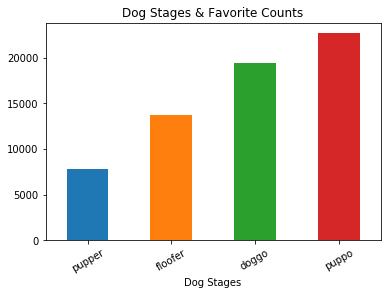

In [712]:
fav_count.plot(kind = 'bar', x = 'dog_stage', y = 'favorite_count', legend = None)
plt.xticks(rotation = 30)
plt.title('Dog Stages & Favorite Counts')
plt.xlabel('Dog Stages');

### Insight 4:
As is shown in the plot, 'puppo' received the highest number of retweets, becoming the most popular stage of dogs.